In [1]:
 %matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance

In [5]:
# Feature Importance
# What features are considered important?
# guided by https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression().fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mdl.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

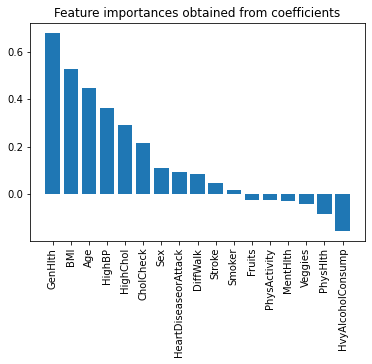

In [6]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

According to the data, GenHlth, BMI, Age, HighBP, and CholCheck are the features that have a bigger affect on the outcome of predicting diabetes in a patient.

Interestingly, heavy alcholol consumption has a negative correlation to predicting diabetes.

# Data Exploration

In [7]:
# What is the correlation of Age and Diabetes?
corr = df['Age'].corr(df['Diabetes'])
corr

0.27873806628190145

In [8]:
# What is the correlation of Sex and Diabetes?
# "Does gender affect diabetes?"
corr = df['Sex'].corr(df['Diabetes'])
corr

0.04441285837125938

In [9]:
type(df['Age'].index)

pandas.core.indexes.range.RangeIndex

In [10]:
# Which age group has the most occurences of diabetes?

diabetic_lst = []
non_diabetic_lst = []

for index, row in df.iterrows():
    if row['Diabetes'] == 1:
        diabetic_lst.append(row)
    else:
        non_diabetic_lst.append(row)

In [11]:
diabetic_df = pd.DataFrame(diabetic_lst)
non_diabetic_df = pd.DataFrame(non_diabetic_lst)

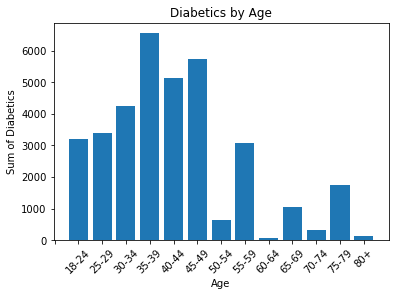

In [12]:
# graphing by age grouping. (see the website page for breakdown of bins from Kaggle)
fig, ax = plt.subplots()

labels = diabetic_df['Age'].unique()
sums = diabetic_df.groupby(by=['Age']).sum()

# used to get the axis in order
import numpy as np
ind = np.arange(14)
ax.set_xticks(ind, labels=['','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'], rotation=45)


ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

plt.savefig('images/Diabetics_by_Age.jpg')

According to our data, the ages are grouped by this schema: 

"13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older"

We can infer from this data that each number is equivalent to 5 years. If this is true, then age group 4 would be the ages of 35 to 39, age group 5 would be 40 to 44, age group 6 is 45 to 49. 

How do these age groups compare in terms of health?
    - can we compare the age groups by general health?

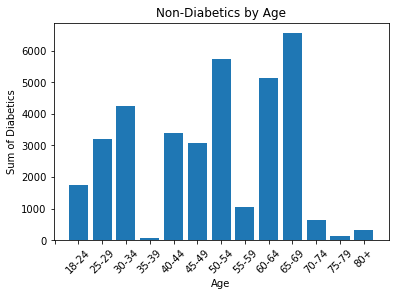

In [13]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['Age'].unique()
sums = df.groupby(by=['Age']).sum()

# used to get the axis in order
import numpy as np
ind = np.arange(14)
ax.set_xticks(ind, labels=['','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'], rotation=45)

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('Age')
ax.set_title('Non-Diabetics by Age')
ax.set_ylabel('Sum of Diabetics')

plt.savefig('images/Non-Diabetics_by_Age.jpg')

Interestingly, age group 4 (ages 35 to 39) is simultaniously the largest majority of diabetics as well as the the lowest amount of diabetics. 

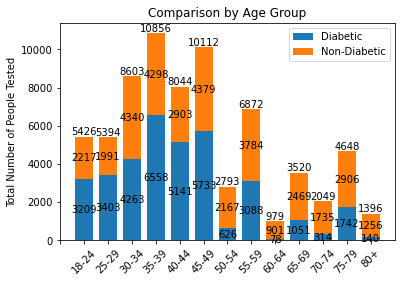

In [14]:
# how do these graphs compare?
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py


labels = diabetic_df['Age'].unique()
diabetic = list(diabetic_df.groupby(by=['Age']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['Age']).count()['Diabetes'])
width = .75       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by Age Group')
# ax.set_xticks(labels)
ax.legend()

# used to get the axis in order
import numpy as np
ind = np.arange(14)
ax.set_xticks(ind, labels=['','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'], rotation=45)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.savefig('images/Age_Graph.jpg')

### Areej will write

In [15]:
# Splitting the dataframe to their respective age groups.

lst_age_4 = []
lst_age_5 = []
lst_age_6 = []

for col, row in df.iterrows():
    if row['Age'] == 4:
        lst_age_4.append(row)
    if row['Age'] == 5:
        lst_age_5.append(row)
    if row['Age'] == 6:
        lst_age_6.append(row)
        
# to dataframe

age_4_df = pd.DataFrame(lst_age_4)
age_5_df = pd.DataFrame(lst_age_5)
age_6_df = pd.DataFrame(lst_age_6)
age_6_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0
20,6.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,6.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
38,6.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Splitting the dataframe by their respective sex.

# according to data, male = 1
lst_sex_male = []
lst_sex_female = []

for col, row in df.iterrows():
    if row['Sex'] == 1:
        lst_sex_male.append(row)
    else:
        lst_sex_female.append(row)

# convert to DF
male_df = pd.DataFrame(lst_sex_male)
female_df = pd.DataFrame(lst_sex_female)
female_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# What is the correlation of BMI and Diabetes?
corr = df['BMI'].corr(df['Diabetes'])
corr

0.29337274476104674

In [18]:
# What is the correlation of General Health and Diabetes?
corr = df['GenHlth'].corr(df['Diabetes'])
corr

0.40761159849491413

Text(0, 0.5, 'Sum of Diabetics')

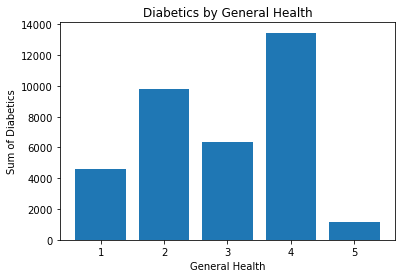

In [19]:
# graphing by general health for diabetics
fig, ax = plt.subplots()

labels = diabetic_df['GenHlth'].unique()
sums = diabetic_df.groupby(by=['GenHlth']).count()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Diabetics by General Health')
ax.set_ylabel('Sum of Diabetics')

There are very few diabetics that have scored a health score of 5. How does the data between of General Health 4 and 5 differ?

In [20]:
# Who are the diabetics who have a General Health Score of 5?
lst = []

for col, row in diabetic_df.iterrows():
    if row['GenHlth'] == 5:
        lst.append(row)

genhlth_5_df = pd.DataFrame(lst)
genhlth_5_df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.0,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.0
mean,9.219747,0.442770,0.748143,0.990826,33.378550,0.622106,0.434469,0.420052,0.542377,0.705767,0.017256,5.0,11.527741,22.979467,0.789428,0.200743,0.832896,1.0
std,2.281813,0.496768,0.434127,0.095353,8.963317,0.484914,0.495741,0.493621,0.498255,0.455747,0.130240,0.0,12.593292,10.285567,0.407760,0.400600,0.373109,0.0
min,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,0.000000,15.000000,1.000000,0.000000,1.000000,1.0
50%,9.000000,0.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.0,5.000000,30.000000,1.000000,0.000000,1.000000,1.0
75%,11.000000,1.000000,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.0,30.000000,30.000000,1.000000,0.000000,1.000000,1.0
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0,30.000000,30.000000,1.000000,1.000000,1.000000,1.0


In [21]:
# Who are the diabetics of who have a General Health Score of 4?
lst = []

for col, row in diabetic_df.iterrows():
    if row['GenHlth'] == 4:
        lst.append(row)

genhlth_4_df = pd.DataFrame(lst)
genhlth_4_df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.00000,9790.0,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.0
mean,9.260163,0.435240,0.706742,0.992748,32.899694,0.542901,0.268539,0.551788,0.554137,0.730235,0.02094,4.0,5.940347,11.272114,0.518080,0.114709,0.797855,1.0
std,2.349100,0.495814,0.455279,0.084855,7.844317,0.498182,0.443222,0.497336,0.497086,0.443860,0.14319,0.0,9.802864,11.793015,0.499699,0.318687,0.401620,0.0
min,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,9.000000,0.000000,1.000000,1.000000,32.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,4.0,0.000000,6.000000,1.000000,0.000000,1.000000,1.0
75%,11.000000,1.000000,1.000000,1.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,4.0,8.000000,21.000000,1.000000,0.000000,1.000000,1.0
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.0,30.000000,30.000000,1.000000,1.000000,1.000000,1.0


#### Contrast between people who have score General Health 4 (highest diabetics sum) to 5 (lowest diabetics sum)

After reviewing the differences between GenHlth4 and GenHlth5, I have found Mental Health and Physical Health have the largest difference of mean. People who scored GH5 generally considered themselves generally physically healthy, and were in better mental health.

MentHlth Mean  
GH4 - 5.9  
GH5 - 11.5  

PhysHlth Mean  
GH4 - 11.3  
GH5 - 23.0  

HeartDiseaseorAttack Mean  
GH4 - 26.9%  
GH5 - 43.4%  

DiffWalk Mean  
GH4 - 51.8%  
GH5 - 78.9%  



Text(0, 0.5, 'Sum of Non Diabetics')

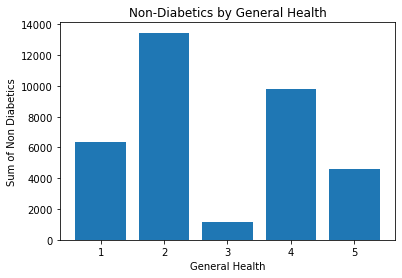

In [22]:
# how do non diabetics fare?
fig, ax = plt.subplots()

labels = non_diabetic_df['GenHlth'].unique()
sums = df.groupby(by=['GenHlth']).sum()

ax.bar(labels, sums['Diabetes'])
ax.set_xlabel('General Health')
ax.set_title('Non-Diabetics by General Health')
ax.set_ylabel('Sum of Non Diabetics')

### Cheng

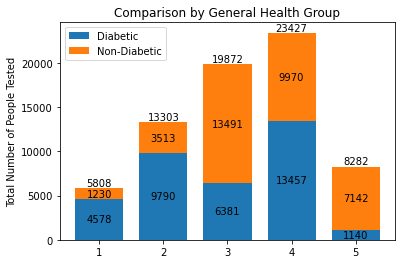

<Figure size 720x720 with 0 Axes>

In [23]:
labels = diabetic_df['GenHlth'].unique()
diabetic = list(diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])
non_diabetic = list(non_diabetic_df.groupby(by=['GenHlth']).count()['Diabetes'])

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10,10))

p1 = ax.bar(labels, diabetic, width, label='Diabetic')
p2 = ax.bar(labels, non_diabetic, width, bottom=diabetic, label='Non-Diabetic')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Total Number of People Tested')
ax.set_title('Comparison by General Health Group')
ax.set_xticks(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)


plt.show()

The highest percentage non diabetics is at 5, and the lowerest percentage is at 1 which is expected if general health correlates with diabetes. What stands out though is the fact that people with health 3 has a notably highest percentage of non diabetics than people in the group with health 4.

### Data Spread

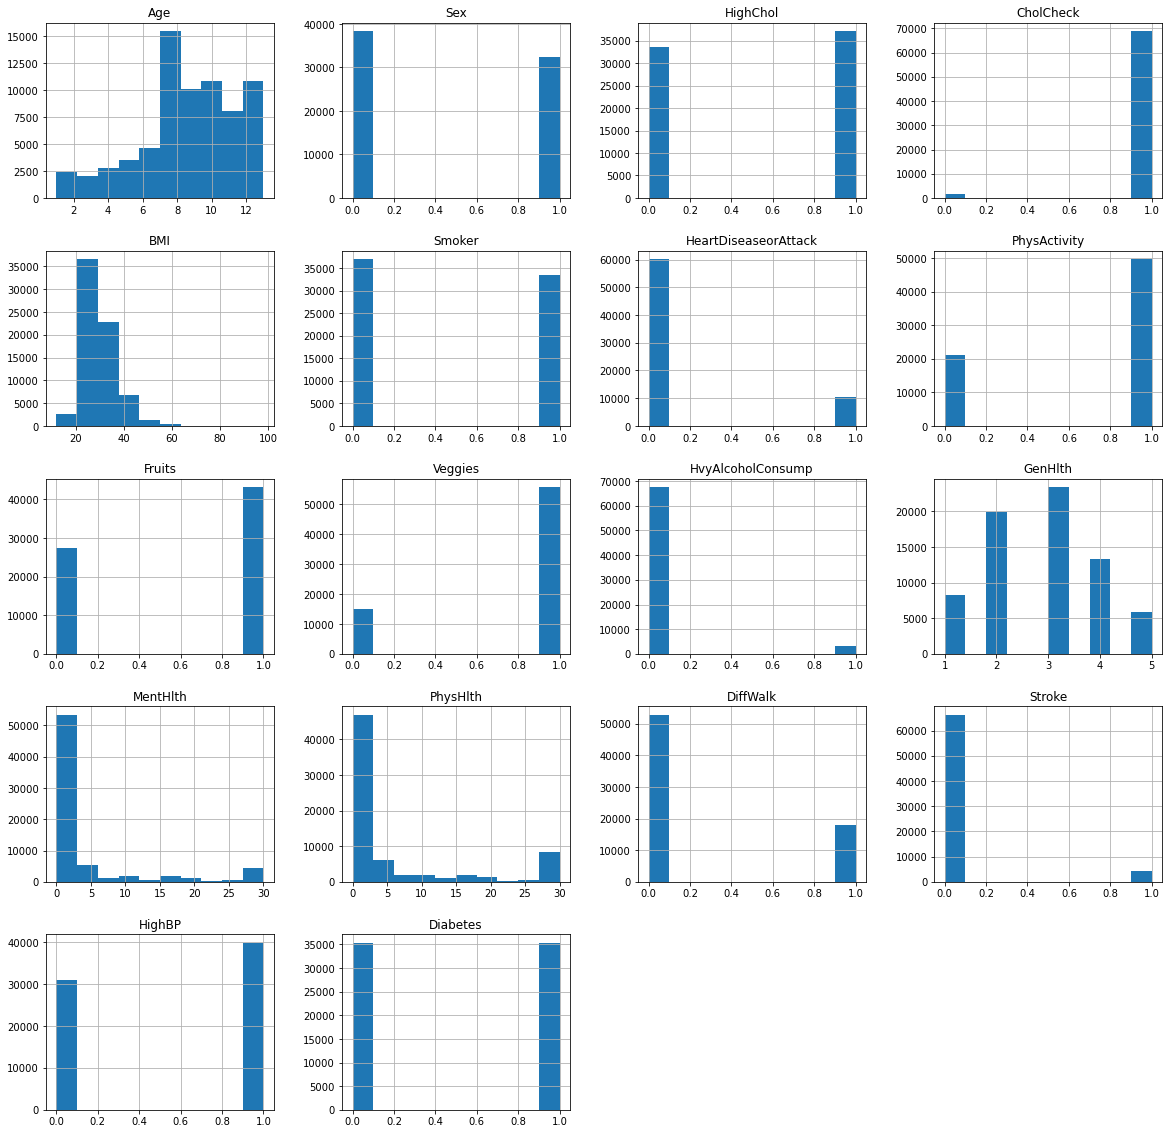

In [24]:
df.hist(figsize=(20,20))
plt.show()

### Julia

In [25]:
corr_df=df.corr()
corr_df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


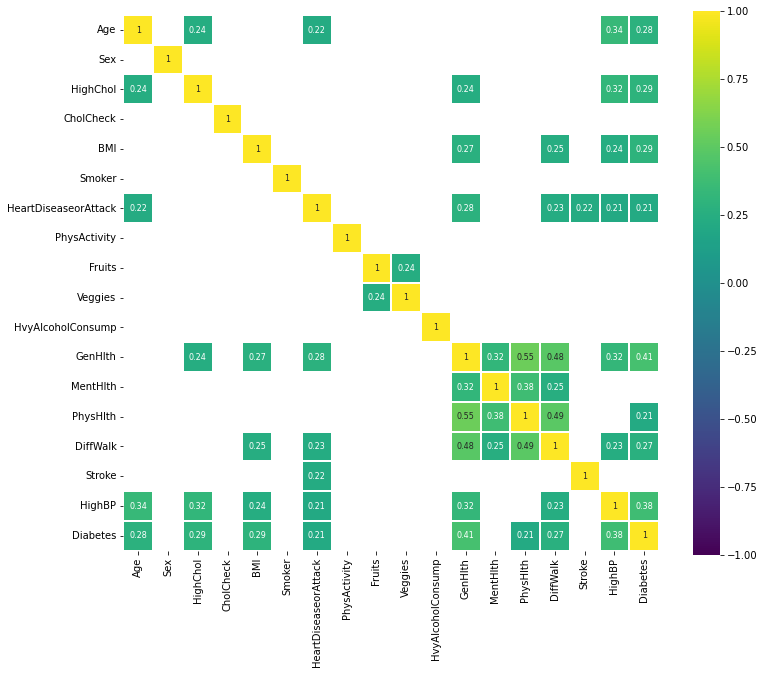

In [26]:
import seaborn as sb
corr = df.corr() 
plt.figure(figsize=(12, 10))

# Change the conditional within the list to see more or less.
sb.heatmap(corr[corr > .2], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, 
            annot_kws={"size": 8}, square=True);

### Julia

### Feature Engineering

In [27]:
# Combining GenHlth, MntHlth, PhysHlth, DiffWalk together by getting the sum of products of these features
temp_df = df

# I can't multiply by 0, so I must scale the following columns by + 1.

for col, row in temp_df.iterrows():
    row['GenHlth'] = row['GenHlth'] + 1;
    row['PhysHlth'] = row['PhysHlth'] + 1;
    row['MentHlth'] = row['MentHlth'] + 1;
    row['DiffWalk'] = row['DiffWalk'] + 1;
    row['PhysActivity'] = row['PhysActivity'] + 1;

In [28]:
general_health = temp_df['GenHlth'] * temp_df['PhysHlth'] * temp_df['MentHlth'] * temp_df['DiffWalk'] * temp_df['PhysActivity']
temp_df['GenHlth'] = general_health
feature_engineering_df = temp_df
feature_engineering_df = feature_engineering_df.drop(['PhysHlth', 'MentHlth', 'DiffWalk', 'PhysActivity', 'Fruits', 'Veggies'], axis = 1)
feature_engineering_df.head()

scaler.fit(feature_engineering_df)

StandardScaler()

We dropped fruits and veggies due to ther insignificance in the correlation chart. 

In [29]:
feature_engineering_df['GenHlth'] = scaler.transform(feature_engineering_df)
feature_engineering_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,-1.607237,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.197681,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.548296,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,0.847066,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,-0.204778,0.0,0.0,0.0


In [30]:
feature_engineering_df.to_csv('Resources/feature_engineered.csv')

Ultimately, removing features from this does not increase the precision nor accuracy. Unforunately, it increased the amount of errors.

In [31]:
general_health = temp_df['GenHlth'] * temp_df['PhysHlth'] * temp_df['MentHlth'] * temp_df['DiffWalk'] * temp_df['PhysActivity']
temp_df['GenHlth'] = general_health
feature_engineering_df = temp_df
feature_engineering_df.head()

scaler.fit(feature_engineering_df)
feature_engineering_df['GenHlth'] = scaler.transform(feature_engineering_df)
feature_engineering_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,2.0,0.0,1.0,0.0,-1.607237,6.0,31.0,1.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,0.0,0.0,1.197681,1.0,1.0,1.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,2.0,1.0,1.0,0.0,1.548296,1.0,11.0,1.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,2.0,1.0,1.0,0.0,0.847066,1.0,4.0,1.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,1.0,0.0,-0.204778,1.0,1.0,1.0,0.0,0.0,0.0


In [32]:
feature_engineering_df.to_csv('Resources/feature_engineered_with_genhlth.csv')